# Progetto di Programmazione di Applicazioni Data Intensive
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Mattia Mencaccini   
Filippo Badioli  
Lorenzo Morri  

# **Spam detection**

# Introduzione


Il fenomeno dello spam rappresenta un problema significativo nella comunicazione digitale, in particolare nella gestione delle email. L'identificazione automatica delle email indesiderate è un'applicazione classica dell'apprendimento automatico, che permette di ridurre la quantità di contenuti non richiesti visualizzati dagli utenti.

In questo progetto affronteremo il problema della classificazione binaria delle email, utilizzando un dataset reale contenente informazioni estratte dal testo del messaggio. L'obiettivo è costruire un modello in grado di prevedere se una email è spam (1) oppure non spam (0) sulla base di una serie di feature numeriche. 

# Caricamento e preparazione del dataset

Vengono importate le librerie necessarie per scaricare i file, organizzare le strutture dati e disegnare i grafici.

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Caricamento dei dati e preprocessing**

In [2]:
dataset = pd.read_csv("spambase_updated.csv")

Cambiamo il tipo di dato di spam: si tratta di un valore booleano (0,1) e non int64.

Il resto dei tipi sembra essere coerente con il tipo di dato rappresentato.

In [3]:
dataset["spam"] = dataset["spam"].astype(bool)
dataset["spam"].dtype #controllo cambio 

dtype('bool')

Di seguito sono riportate le dimensioni in memoria, il numero di istanze non nulle, il tipo delle feature che compongono i dati raccolti nel dataset e le statistiche descrittive.

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4210 non-null   float64
 1   word_freq_address           4210 non-null   float64
 2   word_freq_all               4210 non-null   float64
 3   word_freq_3d                4210 non-null   float64
 4   word_freq_our               4210 non-null   float64
 5   word_freq_over              4210 non-null   float64
 6   word_freq_remove            4210 non-null   float64
 7   word_freq_internet          4210 non-null   float64
 8   word_freq_order             4210 non-null   float64
 9   word_freq_mail              4210 non-null   float64
 10  word_freq_receive           4210 non-null   float64
 11  word_freq_will              4210 non-null   float64
 12  word_freq_people            4210 non-null   float64
 13  word_freq_report            4210 non-n

Controlliamo che non ci siano dati mancanti:

In [5]:
dataset.isna().any().sum()

0

Non ci sono dati mancanti.

Controlliamo se ci sono righe duplicate, e in caso le eliminiamo:

In [6]:
print("Elementi duplicati: ", dataset.duplicated().sum())
dataset = dataset.drop_duplicates()
print("Elementi duplicati dopo rimozione: ", dataset.duplicated().sum())

Elementi duplicati:  391
Elementi duplicati dopo rimozione:  0


**Significato delle feature**

Colonne del set di dati:
- **word_freq_WORD**  
  Frequenza di una parola specifica nell'email (percentuale delle parole totali)

- **char_freq_CHAR**  
  Frequenza di un carattere specifico (ad esempio, `;`, `(`, `[`, `#`) nell'email.

- **capital_run_lenght_average**  
  Lunghezza media delle sequenze di lettere maiuscole consecutive.

- **capital_run_length_longest**  
  Lunghezza della sequenza più lunga di lettere maiuscole consecutive.

- **capital_n_length_total**  
  Numero totale di lettere maiuscole nella mail.

- **spam**  
  Indica se il messaggio email è spam (`1`: Spam, `0`: No Spam).

In [7]:
dataset.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


Il dataset ora contiene 4210 email, ciascuna descritta da 57 feature numeriche e una variabile target binaria (spam), che assume valore 1 per le email spam e 0 per le non spam.
Le variabili sono tutte già numeriche, continue e ben strutturate, quindi non è necessario applicare trasformazioni preliminari complesse.
Dopo aver manipolato il dataset rimuovendo doppioni, controllato la presenza dei dati e controllato il tipo e la distribuzione dei dati abbiamo un ottima base di partenza per l’analisi e l’addestramento dei modelli.

## ANALISI ESPLORATIVA

La variabile target spam è binaria: assume valore 1 per indicare un’email classificata come spam e 0 per le email legittime.
Analizzare la distribuzione di questa variabile è fondamentale per capire se il dataset è bilanciato o sbilanciato.

Un dataset sbilanciato potrebbe influenzare negativamente le prestazioni dei modelli, spingendoli a favorire la classe più rappresentata.

<Axes: title={'center': 'Mail Spam'}>

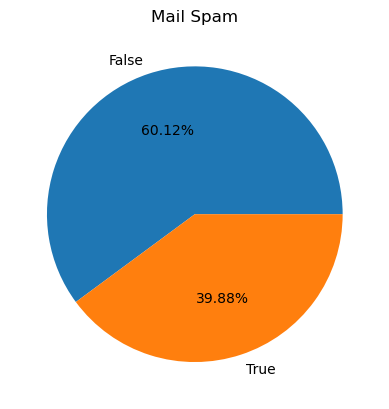

In [8]:
plt.title("Mail Spam")
dataset["spam"].value_counts().plot.pie(autopct="%.2f%%", ylabel="")

In questo caso, la distribuzione tra spam e non spam risulta relativamente bilanciata, condizione favorevole per l’addestramento di modelli affidabili.

Per esplorare le differenze tra email spam e non spam, è stato calcolato il valore medio di ogni feature separatamente per le due classi (spam=1 e spam=0).

L'obiettivo è identificare quali variabili mostrano i cambiamenti più significativi tra le due categorie.

Analizziamo i dati non spam:

In [9]:
data_no_spam = dataset[dataset["spam"]==0].drop(columns=["spam"])#sono tutte non spam
data_no_spam.mean().sort_values(ascending=False).head()

capital_run_length_total      174.461083
capital_run_length_longest     19.038325
capital_run_length_average      2.407102
word_freq_you                   1.349265
word_freq_hp                    0.942671
dtype: float64

Ora filtriamo il dataset e recuperiamo solo le mail spam per analizzare le possibili relazioni con i dati.

In [10]:
data_spam = dataset[dataset["spam"]==1].drop(columns=["spam"])#sono tutte spam
data_spam.mean().sort_values(ascending=False).head()

capital_run_length_total      467.132222
capital_run_length_longest    102.038714
capital_run_length_average      9.871248
word_freq_you                   2.274771
word_freq_your                  1.366522
dtype: float64

Otteniamo la differenza relativa per vedere quali parole sono più presenti nelle mail spam.

In [11]:
data_diff=((data_spam.mean() - data_no_spam.mean())/data_no_spam.mean()).sort_values(ascending=False)
data_diff.head(10)

word_freq_3d           159.564243
word_freq_000           31.459779
word_freq_remove        29.285179
word_freq_credit        23.010680
char_freq_$             12.998381
word_freq_addresses     10.644001
word_freq_money          9.575461
word_freq_receive        6.475120
word_freq_free           6.277448
word_freq_business       4.690372
dtype: float64

Questa operazione serve per evidenziare le feature con maggiore impatto discriminante.

Le differenze più marcate tra spam e non spam sono state rappresentate graficamente tramite boxplot delle feature con maggiore variazione relativa.
Questo tipo di grafico permette di visualizzare la distribuzione statistica e la presenza di outlier (sono punti dati che cadono al di fuori di 1.5 volte l'intervallo interquartile, al di sopra del terzo quartile o al di sotto del primo quartile) per ciascuna feature discriminante.

<Axes: >

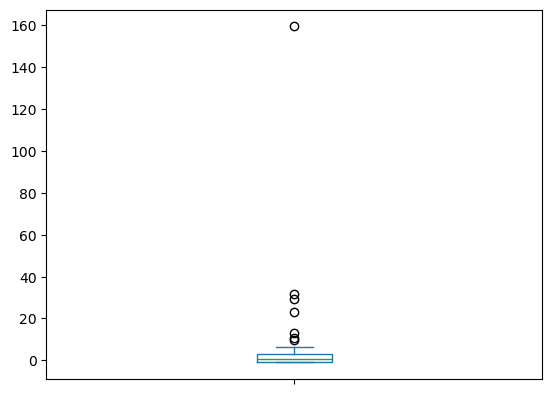

In [12]:
data_diff.plot.box()

La valutazione visiva conferma che alcune feature presentano valori medi e varianza differenti tra le due classi, risultando utili per la classificazione.

Recuperiamo i dati estremamente significativi con il metodo IQR:

In [13]:
Q1 = data_diff.quantile(0.25)#primo quartile
Q3 = data_diff.quantile(0.75)#terzo quartile
IQR = Q3 - Q1
outlier_mask = (data_diff < Q1 - 1.5 * IQR) | (data_diff > Q3 + 1.5 * IQR)
data_diff[outlier_mask]

word_freq_3d           159.564243
word_freq_000           31.459779
word_freq_remove        29.285179
word_freq_credit        23.010680
char_freq_$             12.998381
word_freq_addresses     10.644001
word_freq_money          9.575461
dtype: float64

Per ogni feature differenziale è stato calcolato l’intervallo interquartile (IQR) per identificare la presenza di valori anomali (outlier).  
L’analisi degli outlier è utile per verificare se alcune variabili sono influenzate da pochi casi estremi e se tali valori possono impattare negativamente i modelli.

Mostriamo nel seguente grafico le medie di quanto sono incisive queste feature:

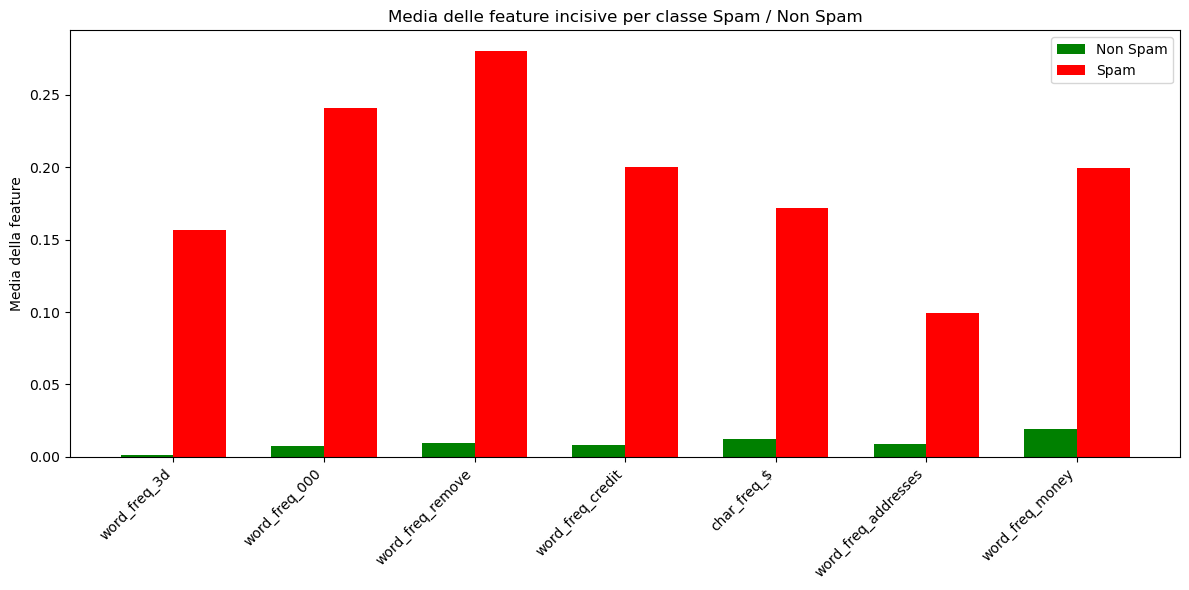

In [14]:
colonne_significative = data_diff[outlier_mask].index.tolist()

# Calcola la media delle feature per spam=0 e spam=1
media_non_spam = dataset[dataset["spam"] == 0][colonne_significative].mean()
media_spam = dataset[dataset["spam"] == 1][colonne_significative].mean()

# Crea il grafico
x = np.arange(len(colonne_significative))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, media_non_spam, width, label='Non Spam', color='green')
plt.bar(x + width/2, media_spam, width, label='Spam', color='red')

plt.xticks(x, colonne_significative, rotation=45, ha='right')
plt.ylabel('Media della feature')
plt.title('Media delle feature incisive per classe Spam / Non Spam')
plt.legend()
plt.tight_layout()
plt.show()


Infine, è stata calcolata la matrice di correlazione tra tutte le feature numeriche.  
La correlazione lineare (Pearson) misura quanto due variabili variano insieme:
- Valori prossimi a 1 indicano correlazione positiva forte
- Valori prossimi a -1 indicano correlazione negativa forte
- Valori prossimi a 0 indicano assenza di correlazione

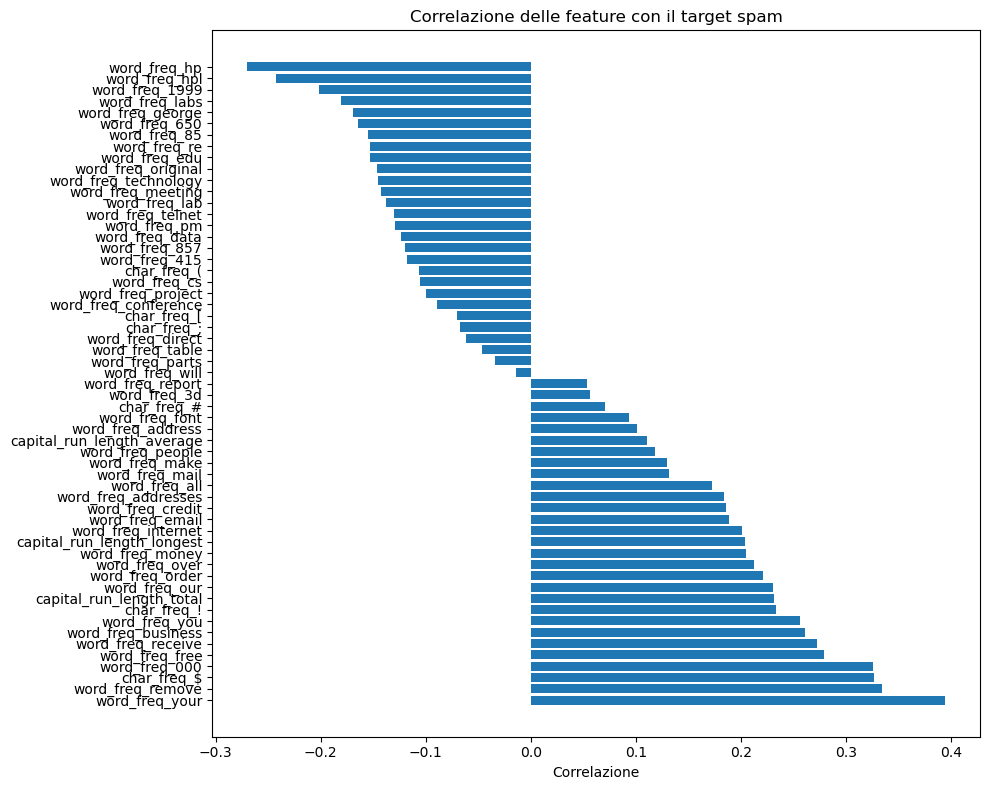

In [15]:
corr_target = dataset.corr()["spam"].drop("spam").sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(corr_target.index, corr_target.values)
plt.title("Correlazione delle feature con il target spam")
plt.xlabel("Correlazione")
plt.tight_layout()
plt.show()


Dal grafico si vede chiaramente che alcune parole sono fortemente legate alle email di spam. In particolare, termini come "your", "free", "remove" e il simbolo "$" hanno una correlazione positiva alta con il target spam, il che vuol dire che quando compaiono in un’email, è più probabile che sia spam. Al contrario, parole come "hp", "lab", "edu" o "technology" hanno una correlazione negativa, quindi si trovano più spesso in email normali, non spam. 

# Preparazione dati

Importiamo le librerie necessarie per la preparazione e spartizione dei dati:

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

La prima fase della preparazione dei dati consiste nella separazione tra le feature (variabili indipendenti) e la variabile target (spam).
Le feature vengono salvate nella variabile X, mentre il target in y.
Questo passaggio è fondamentale per l’addestramento dei modelli di machine learning, che devono apprendere a predire y sulla base di X.  
Il dataset viene suddiviso in tre sottoinsiemi:
- Training set (80%): usato per addestrare i modelli
- Validation set (10%): usato per valutare le prestazioni su dati mai visti
- Test set (10%): usato per valutare le prestazioni su dati mai visti dopo la ricerca degli iperparametri

La suddivisione è stratificata rispetto alla variabile target, in modo da mantenere la stessa proporzione di email spam e non spam in entrambi i sottoinsiemi.
Questo aiuta a evitare che i modelli si trovino sbilanciati nella fase di valutazione.

In [17]:
X = dataset.drop("spam",axis=1)
y = dataset["spam"]

#primo split -> 80% train, 20% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#secondo split -> 10% val, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train set: {len(X_train)}")
print(f"Validation set: {len(X_val)}")
print(f"Test set: {len(X_test)}")
print("Verifica sul numero di colonne totale: ", len(X_train)+len(X_test)+len(X_val)==len(dataset))

Train set: 3368
Validation set: 421
Test set: 421
Verifica sul numero di colonne totale:  True


Alcuni modelli, come la Logistic Regression, sono sensibili alla scala delle feature.
Per questo motivo viene applicata una standardizzazione dei dati numerici tramite StandardScaler, che trasforma ogni feature in modo che:  
la media sia 0,  
la deviazione standard sia 1.

I dati vengono standardizzati solo dopo lo split, per evitare che il test set sia “influenzato” dai dati di training, causando data leakage.

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

La libreria XGBoost impone alcune restrizioni sui nomi delle colonne: non devono contenere caratteri speciali come "[" , "]" , "<".
Poiché il dataset originale include nomi come char_freq_[ o char_freq_<, abbiamo effettuato una pulizia dei nomi per renderlo compatibile con XGBoost.

In particolare, i caratteri proibiti li abbiamo sostituiti con stringhe descrittive ([ → par_open, < → less, ecc.), mantenendo comunque il significato delle feature.
La struttura dei dati non cambia, ma questa fase è essenziale per evitare errori durante l’addestramento del modello XGBoost.

In [19]:
# Pulizia nomi delle colonne per XGBoost
X_train_xgb = X_train.copy()
X_test_xgb = X_test.copy()
X_val_xgb = X_val.copy()

X_train_xgb.columns = [col.replace('[', 'par_open')
                              .replace(']', 'par_close')
                              .replace('<', 'less')
                              for col in X_train_xgb.columns]

X_test_xgb.columns = X_train_xgb.columns
X_val_xgb.columns = X_train_xgb.columns


# Addestramento dei modelli

Importiamo le librerie necessarie per addestrare i modelli:

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Logistic Regression

Come primo modello di classificazione abbiamo implementato la Logistic Regression, un classificatore lineare molto utilizzato per la sua interpretabilità ed efficienza. Il modello è stato addestrato sul training set e valutato sul validation set, composto da dati completamente nuovi, mai visti in fase di addestramento.

In [21]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predizioni
y_pred_log = log_reg.predict(X_val_scaled)
y_prob_log = log_reg.predict_proba(X_val_scaled)[:, 1]

# Report delle metriche
print("=== Logistic Regression ===")
print(classification_report(y_val, y_pred_log))


=== Logistic Regression ===
              precision    recall  f1-score   support

       False       0.93      0.96      0.94       253
        True       0.94      0.89      0.91       168

    accuracy                           0.93       421
   macro avg       0.93      0.92      0.93       421
weighted avg       0.93      0.93      0.93       421



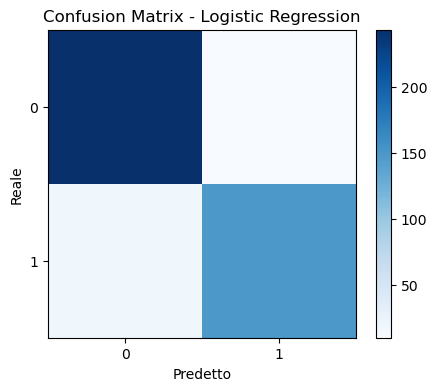

True Negative (Non Spam corretto): 243
False Positive (Non Spam sbagliato come Spam): 10
False Negative (Spam sbagliato come Non Spam): 19
True Positive (Spam corretto): 149


In [22]:
# Confusion matrix
cm_log = confusion_matrix(y_val, y_pred_log)

plt.figure(figsize=(5, 4))
plt.imshow(cm_log, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()
TN, FP, FN, TP = cm_log.ravel()

print(f"True Negative (Non Spam corretto): {TN}")
print(f"False Positive (Non Spam sbagliato come Spam): {FP}")
print(f"False Negative (Spam sbagliato come Non Spam): {FN}")
print(f"True Positive (Spam corretto): {TP}")

L'analisi della matrice di confusione evidenzia che su 168 email realmente spam, il modello ne ha identificate correttamente 149, mentre ha commesso 19 falsi negativi (spam classificati erroneamente come non spam).
Allo stesso tempo, ha mantenuto basso il numero di falsi positivi (solo 10), segno che raramente classifica email legittime come spam.

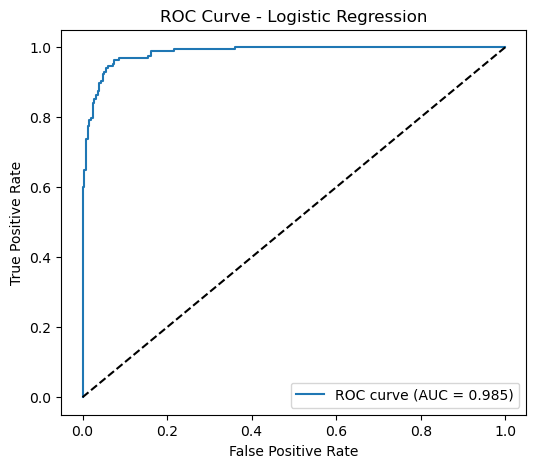

In [23]:
fpr_log, tpr_log, _ = roc_curve(y_val, y_prob_log)
roc_auc_log = roc_auc_score(y_val, y_prob_log)

plt.figure(figsize=(6, 5))
plt.plot(fpr_log, tpr_log, label=f"ROC curve (AUC = {roc_auc_log:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


La curva ROC mostra un'eccellente capacità discriminativa, con un AUC pari a 0.985, molto vicino al valore ideale di 1. Questo conferma che il classificatore è in grado di distinguere bene tra email spam e non spam, anche se presenta un leggero squilibrio a favore della precisione: il modello è prudente nel classificare spam, a costo di lasciarne alcune non intercettate.

## Random forest

Il secondo modello utilizzato è una Random Forest Classifier. Questo tipo di algoritmo è basato su un insieme di alberi decisionali e sfrutta la combinazione di più modelli deboli per ottenere una classificazione più robusta e accurata.

In [24]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predizioni
y_pred_rf = rf_clf.predict(X_val)
y_prob_rf = rf_clf.predict_proba(X_val)[:, 1]

# Report delle metriche
print("=== Random Forest Classifier ===")
print(classification_report(y_val, y_pred_rf))


=== Random Forest Classifier ===
              precision    recall  f1-score   support

       False       0.95      0.96      0.95       253
        True       0.94      0.92      0.93       168

    accuracy                           0.95       421
   macro avg       0.94      0.94      0.94       421
weighted avg       0.95      0.95      0.95       421



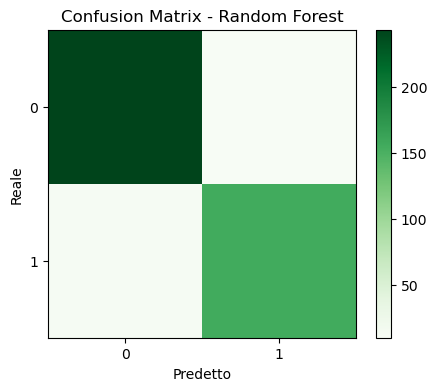

True Negative (Non Spam corretto): 243
False Positive (Non Spam sbagliato come Spam): 10
False Negative (Spam sbagliato come Non Spam): 13
True Positive (Spam corretto): 155


In [25]:
# Confusion matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)

plt.figure(figsize=(5, 4))
plt.imshow(cm_rf, cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()
TN, FP, FN, TP = cm_rf.ravel()

print(f"True Negative (Non Spam corretto): {TN}")
print(f"False Positive (Non Spam sbagliato come Spam): {FP}")
print(f"False Negative (Spam sbagliato come Non Spam): {FN}")
print(f"True Positive (Spam corretto): {TP}")

La matrice di confusione mostra che il modello ha identificato correttamente 155 email spam su 168, con 13 falsi negativi. Il numero di falsi positivi è contenuto a 10: solo poche email legittime sono state erroneamente etichettate come spam.

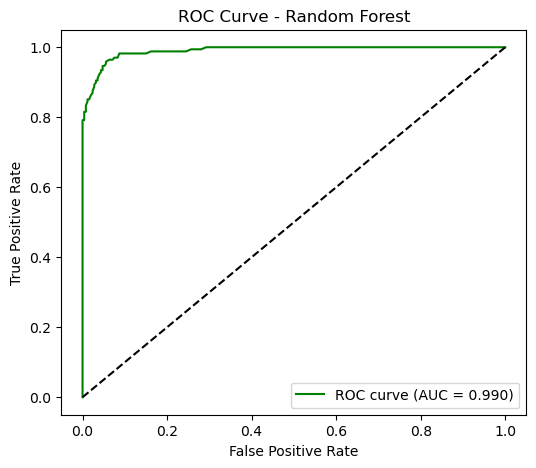

In [26]:
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_prob_rf)
roc_auc_rf = roc_auc_score(y_val, y_prob_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f"ROC curve (AUC = {roc_auc_rf:.3f})", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


La curva ROC ha un’area sotto la curva pari a 0.990, indicatore di un’eccellente capacità discriminativa. Il modello è in grado di bilanciare bene la sensibilità (recall) e la precisione, intercettando gran parte delle email spam e mantenendo un basso tasso di errore sulle email legittime.

In sintesi, la Random Forest mostra un comportamento molto affidabile, migliorando leggermente le prestazioni rispetto alla Logistic Regression.

## XGBoost

Il terzo modello analizzato è XGBoost, un classificatore gradient boosting ad alte prestazioni, molto utilizzato nei problemi di classificazione supervisionata.

In [27]:
# XGBoost Classifier
xgb_clf = XGBClassifier( eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_xgb, y_train)

#Predizioni
y_pred_xgb = xgb_clf.predict(X_val_xgb)
y_prob_xgb = xgb_clf.predict_proba(X_val_xgb)[:, 1]

# Report delle metriche
print("=== XGBoost Classifier ===")
print(classification_report(y_val, y_pred_xgb))

=== XGBoost Classifier ===
              precision    recall  f1-score   support

       False       0.94      0.95      0.94       253
        True       0.92      0.91      0.92       168

    accuracy                           0.93       421
   macro avg       0.93      0.93      0.93       421
weighted avg       0.93      0.93      0.93       421



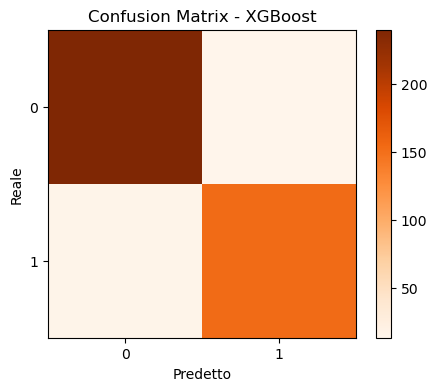

True Negative (Non Spam corretto): 240
False Positive (Non Spam sbagliato come Spam): 13
False Negative (Spam sbagliato come Non Spam): 15
True Positive (Spam corretto): 153


In [28]:
# Confusion matrix
cm_xgb = confusion_matrix(y_val, y_pred_xgb)

plt.figure(figsize=(5, 4))
plt.imshow(cm_xgb, cmap='Oranges')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()
TN, FP, FN, TP = cm_xgb.ravel()

print(f"True Negative (Non Spam corretto): {TN}")
print(f"False Positive (Non Spam sbagliato come Spam): {FP}")
print(f"False Negative (Spam sbagliato come Non Spam): {FN}")
print(f"True Positive (Spam corretto): {TP}")

La matrice di confusione mostra che XGBoost ha identificato correttamente 153 email spam su 168, con 15 falsi negativi, mentre ha commesso 13 falsi positivi classificando alcune email legittime come spam.

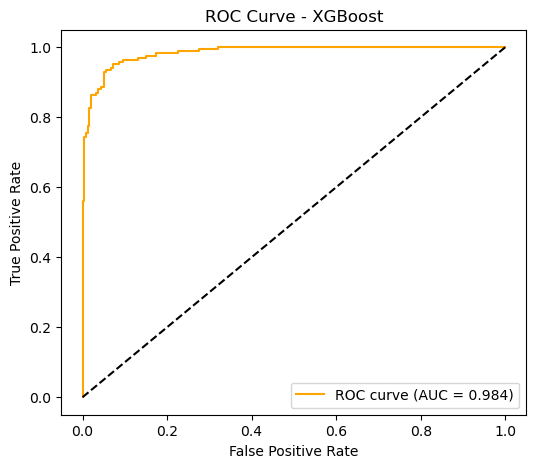

In [29]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_val, y_prob_xgb)

plt.figure(figsize=(6, 5))
plt.plot(fpr_xgb, tpr_xgb, label=f"ROC curve (AUC = {roc_auc_xgb:.3f})", color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


La curva ROC ha un AUC pari a 0.984, segno di un’ottima capacità di distinguere tra le due classi, seppur leggermente inferiore rispetto a Random Forest.

Complessivamente, XGBoost si è comportato molto bene, ottenendo performance simili agli altri modelli ma leggermente inferiori rispetto alla Random Forest, soprattutto in termini di recall e precisione. Nonostante ciò, rappresenta comunque una soluzione competitiva e robusta per il problema affrontato.

I modelli basati su alberi, in particolare Random Forest e XGBoost, sono riusciti a catturare meglio le relazioni non lineari tra le feature. Tra questi, la Random Forest ha ottenuto le migliori prestazioni complessive, con il miglior compromesso tra precisione e capacità di rilevare email spam (recall), oltre a un AUC pari a 0.990. Si conferma quindi come il modello più efficace per affrontare il problema di classificazione delle email spam in questo contesto.

# Ricerca iperparametri

Importiamo le librerie:

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## Random Forest ottimizzato

Per migliorare le prestazioni del modello Random Forest, è stata effettuata una ricerca esaustiva degli iperparametri utilizzando GridSearchCV con validazione incrociata a 5-fold (cv=5) e scoring='f1' per massimizzare il bilanciamento tra precisione e richiamo.

In [31]:
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring='f1'
)

grid_search_rf.fit(X_train, y_train)

# Migliori parametri trovati
print("Migliori iperparametri RF:", grid_search_rf.best_params_)


Migliori iperparametri RF: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


=== Random Forest Ottimizzata ===
              precision    recall  f1-score   support

       False       0.94      0.96      0.95       253
        True       0.94      0.90      0.92       168

    accuracy                           0.94       421
   macro avg       0.94      0.93      0.94       421
weighted avg       0.94      0.94      0.94       421



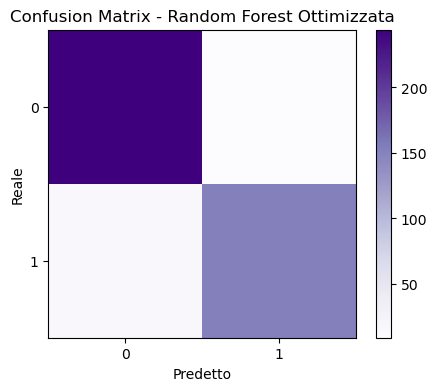

True Negative (Non Spam corretto): 244
False Positive (Non Spam sbagliato come Spam): 9
False Negative (Spam sbagliato come Non Spam): 16
True Positive (Spam corretto): 152


In [32]:
# Predizioni con il miglior modello
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_val)
y_prob_best_rf = best_rf.predict_proba(X_val)[:, 1]

# Report
print("=== Random Forest Ottimizzata ===")
print(classification_report(y_val, y_pred_best_rf))

# Confusion matrix
cm_best_rf = confusion_matrix(y_val, y_pred_best_rf)

plt.figure(figsize=(5, 4))
plt.imshow(cm_best_rf, cmap='Purples')
plt.title("Confusion Matrix - Random Forest Ottimizzata")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()
TN, FP, FN, TP = cm_best_rf.ravel()

print(f"True Negative (Non Spam corretto): {TN}")
print(f"False Positive (Non Spam sbagliato come Spam): {FP}")
print(f"False Negative (Spam sbagliato come Non Spam): {FN}")
print(f"True Positive (Spam corretto): {TP}")

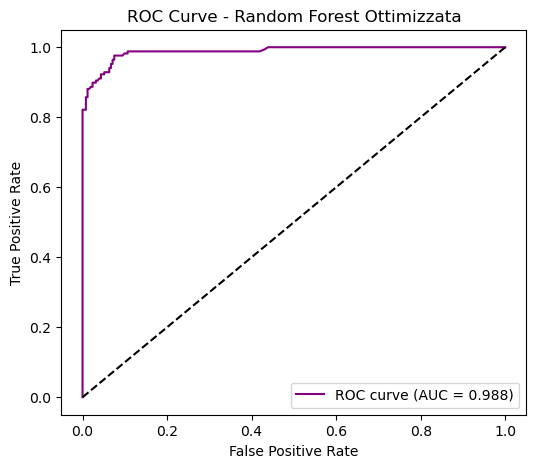

In [33]:
fpr_best_rf, tpr_best_rf, _ = roc_curve(y_val, y_prob_best_rf)
roc_auc_best_rf = roc_auc_score(y_val, y_prob_best_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_best_rf, tpr_best_rf, label=f"ROC curve (AUC = {roc_auc_best_rf:.3f})", color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Ottimizzata")
plt.legend()
plt.show()

L’analisi della matrice di confusione mostra 152 email spam classificate correttamente su 168, con 16 falsi negativi. I falsi positivi sono contenuti (solo 9 email legittime etichettate come spam).
La curva ROC conferma la qualità del classificatore, con un’area sotto la curva molto elevata.

A confronto con la versione non ottimizzata, il modello ottimizzato ha ottenuto prestazioni leggermente inferiori sul validation set. In particolare, pur riducendo lievemente i falsi positivi, ha mostrato un peggioramento del recall, identificando meno email spam.
Questo risultato evidenzia che, in alcuni casi, un modello base ben configurato può superare la versione ottimizzata, soprattutto quando l’ottimizzazione si basa su una singola metrica e non tiene conto dell’intero bilanciamento tra gli errori.

Ora eseguiamo Random Forest ottimizzato sulla parte di dataset di test, ovvero su dati mai visti:

=== Valutazione su Test Set (Random Forest Ottimizzata) ===
              precision    recall  f1-score   support

       False       0.95      0.96      0.96       253
        True       0.94      0.93      0.93       168

    accuracy                           0.95       421
   macro avg       0.95      0.94      0.95       421
weighted avg       0.95      0.95      0.95       421



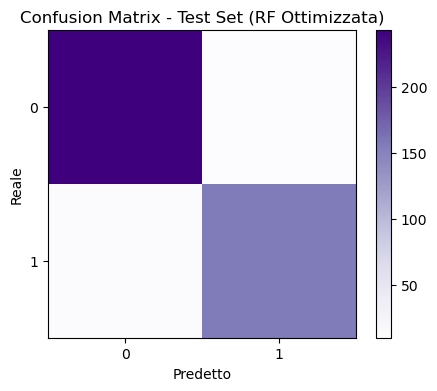

True Negative (Non Spam corretto): 243
False Positive (Non Spam sbagliato come Spam): 10
False Negative (Spam sbagliato come Non Spam): 12
True Positive (Spam corretto): 156


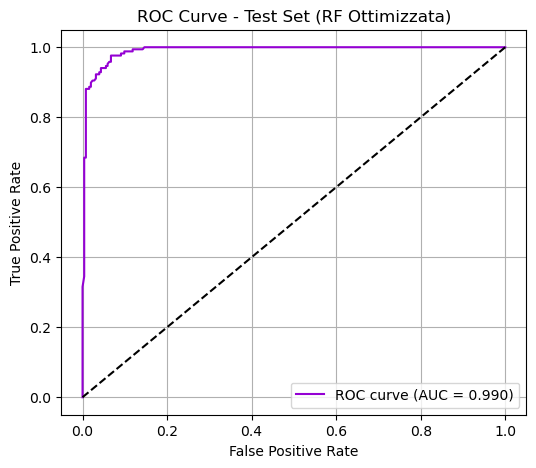

In [34]:
y_test_pred = best_rf.predict(X_test)
y_test_prob = best_rf.predict_proba(X_test)[:, 1]

# Classification report
print("=== Valutazione su Test Set (Random Forest Ottimizzata) ===")
print(classification_report(y_test, y_test_pred))

cm_test_rf = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5, 4))
plt.imshow(cm_test_rf, cmap='Purples')
plt.title("Confusion Matrix - Test Set (RF Ottimizzata)")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()
TN, FP, FN, TP = cm_test_rf.ravel()

print(f"True Negative (Non Spam corretto): {TN}")
print(f"False Positive (Non Spam sbagliato come Spam): {FP}")
print(f"False Negative (Spam sbagliato come Non Spam): {FN}")
print(f"True Positive (Spam corretto): {TP}")

fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_test_prob)
roc_auc_test_rf = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr_test_rf, tpr_test_rf, label=f"ROC curve (AUC = {roc_auc_test_rf:.3f})", color='darkviolet')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test Set (RF Ottimizzata)")
plt.legend()
plt.grid()
plt.show()


L'analisi della matrice di confusione mostra che il modello ha identificato correttamente 156 email spam su 168, con 12 falsi negativi, e ha classificato 243 email legittime su 253 in modo corretto, con solo 10 falsi positivi.

L’AUC pari a 0.990 indica un’eccellente capacità del modello nel discriminare le email spam e non spam, confermando che il modello generalizza molto bene al di fuori del training e validation set.

Questo risultato dimostra che la Random Forest Ottimizzata risulta quindi una scelta affidabile per la classificazione automatica delle email spam.

## XGBoost ottimizzato

Il modello XGBoost è stato sottoposto a un processo di ottimizzazione degli iperparametri tramite GridSearchCV allo stesso modo di Random Forest.

In [35]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    n_jobs=-1,
    scoring='f1'
)

grid_search_xgb.fit(X_train_xgb, y_train)

# Migliori parametri trovati
print("Migliori iperparametri XGBoost:", grid_search_xgb.best_params_)


Migliori iperparametri XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


=== XGBoost Ottimizzato ===
              precision    recall  f1-score   support

       False       0.95      0.96      0.95       253
        True       0.93      0.93      0.93       168

    accuracy                           0.95       421
   macro avg       0.94      0.94      0.94       421
weighted avg       0.95      0.95      0.95       421



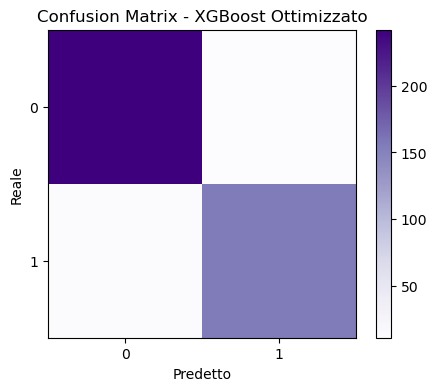

True Negative (Non Spam corretto): 242
False Positive (Non Spam sbagliato come Spam): 11
False Negative (Spam sbagliato come Non Spam): 12
True Positive (Spam corretto): 156


In [36]:
# Best estimator XGBoost trovato con GridSearchCV
best_xgb = grid_search_xgb.best_estimator_

# Predizioni su test set
y_pred_best_xgb = best_xgb.predict(X_val_xgb)
y_prob_best_xgb = best_xgb.predict_proba(X_val_xgb)[:, 1]

# Report di classificazione
print("=== XGBoost Ottimizzato ===")
print(classification_report(y_val, y_pred_best_xgb))

# Matrice di confusione
cm_best_xgb = confusion_matrix(y_val, y_pred_best_xgb)

plt.figure(figsize=(5, 4))
plt.imshow(cm_best_xgb, cmap='Purples')
plt.title("Confusion Matrix - XGBoost Ottimizzato")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()

# Estrazione valori TN, FP, FN, TP
TN, FP, FN, TP = cm_best_xgb.ravel()

print(f"True Negative (Non Spam corretto): {TN}")
print(f"False Positive (Non Spam sbagliato come Spam): {FP}")
print(f"False Negative (Spam sbagliato come Non Spam): {FN}")
print(f"True Positive (Spam corretto): {TP}")

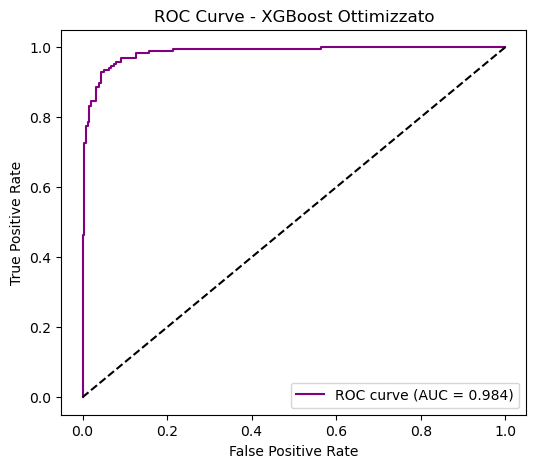

In [37]:
# Calcolo FPR, TPR e AUC per XGBoost
fpr_best_xgb, tpr_best_xgb, _ = roc_curve(y_val, y_prob_best_xgb)
roc_auc_best_xgb = roc_auc_score(y_val, y_prob_best_xgb)

plt.figure(figsize=(6, 5))
plt.plot(fpr_best_xgb, tpr_best_xgb, label=f"ROC curve (AUC = {roc_auc_best_xgb:.3f})", color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost Ottimizzato")
plt.legend()
plt.show()

L’analisi della matrice di confusione mostra 156 email spam classificate correttamente su 168, con 12 falsi negativi. I falsi positivi sono contenuti (solo 11 email legittime etichettate come spam). 
La curva ROC conferma la qualità del classificatore, aumentando a 0.984, con un’area sotto la curva molto elevata.

Questo dimostra che, dopo l’ottimizzazione, XGBoost ha significativamente migliorato le sue prestazioni, riducendo di 1 sia il numero di falsi positivi che di falsi negativi.

Ora eseguiamo XGBoost ottimizzato sulla parte di dataset di test:

=== Valutazione su Test Set (XGBoost) ===
              precision    recall  f1-score   support

       False       0.95      0.96      0.96       253
        True       0.94      0.93      0.93       168

    accuracy                           0.95       421
   macro avg       0.95      0.94      0.95       421
weighted avg       0.95      0.95      0.95       421



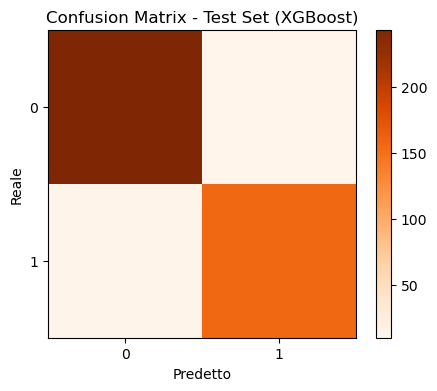

True Negative (Non Spam corretto): 243
False Positive (Non Spam sbagliato come Spam): 10
False Negative (Spam sbagliato come Non Spam): 12
True Positive (Spam corretto): 156


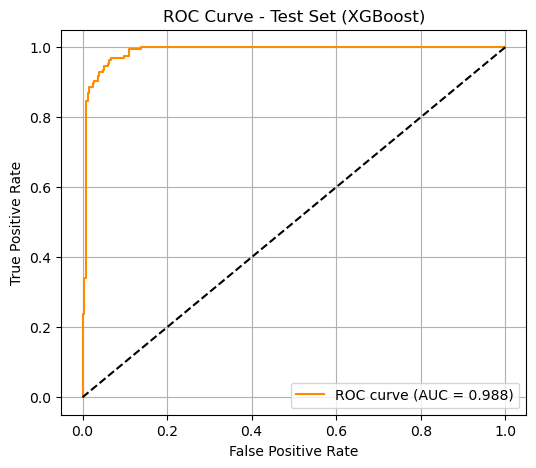

In [38]:
y_test_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test_xgb)
y_test_prob_xgb = grid_search_xgb.best_estimator_.predict_proba(X_test_xgb)[:, 1]

print("=== Valutazione su Test Set (XGBoost) ===")
print(classification_report(y_test, y_test_pred_xgb))

cm_test_xgb = confusion_matrix(y_test, y_test_pred_xgb)

plt.figure(figsize=(5, 4))
plt.imshow(cm_test_xgb, cmap='Oranges')
plt.title("Confusion Matrix - Test Set (XGBoost)")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.colorbar()
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()

TN, FP, FN, TP = cm_test_xgb.ravel()

print(f"True Negative (Non Spam corretto): {TN}")
print(f"False Positive (Non Spam sbagliato come Spam): {FP}")
print(f"False Negative (Spam sbagliato come Non Spam): {FN}")
print(f"True Positive (Spam corretto): {TP}")

fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_test_prob_xgb)
roc_auc_test_xgb = roc_auc_score(y_test, y_test_prob_xgb)

plt.figure(figsize=(6, 5))
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f"ROC curve (AUC = {roc_auc_test_xgb:.3f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test Set (XGBoost)")
plt.legend()
plt.grid()
plt.show()


L'analisi della matrice di confusione evidenzia che il modello ha correttamente identificato 156 email spam su 168, con 12 falsi negativi, mentre ha classificato correttamente 243 email legittime su 253, con 10 falsi positivi.

L'AUC di 0.988 sottolinea l'eccellente capacità del modello XGBoost nel distinguere efficacemente tra email spam e non spam, dimostrando una solida generalizzazione anche su dati non visti durante l’addestramento.

Questi risultati confermano che il modello XGBoost ottimizzato rappresenta una scelta molto valida e affidabile per la classificazione automatica delle email spam.

# Analisi finale dei modelli e conclusione

Dopo l’addestramento e la valutazione dei tre modelli di classificazione, abbiamo confrontato le prestazioni sia in termini di precisione che di capacità discriminativa.

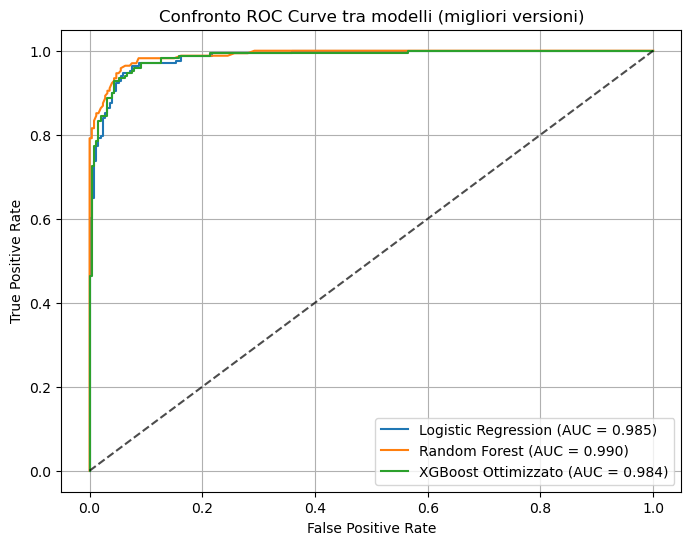

In [39]:
# Plot ROC curve per tutti i modelli
plt.figure(figsize=(8, 6))

plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})")
#plt.plot(fpr_best_rf, tpr_best_rf, label=f"Random Forest Ottimizzata (AUC = {roc_auc_best_rf:.3f})")
#plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.3f})", linestyle="--")
plt.plot(fpr_best_xgb, tpr_best_xgb, label=f"XGBoost Ottimizzato (AUC = {roc_auc_best_xgb:.3f})")

plt.plot([0, 1], [0, 1], 'k--', alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Confronto ROC Curve tra modelli (migliori versioni)")
plt.legend()
plt.grid()
plt.show()


Dall’analisi delle curve ROC emerge che tutti i migliori modelli raggiungono ottimi valori di AUC.

La Random Forest, nel nostro progetto, rimane il modello più efficace, con la miglior capacità di distinguere tra email spam e non spam.

Anche il confronto sulle metriche classiche (precision, recall, f1-score) ha evidenziato come Random Forest mantenga un ottimo bilanciamento, riuscendo a ridurre al minimo sia i falsi positivi che i falsi negativi.

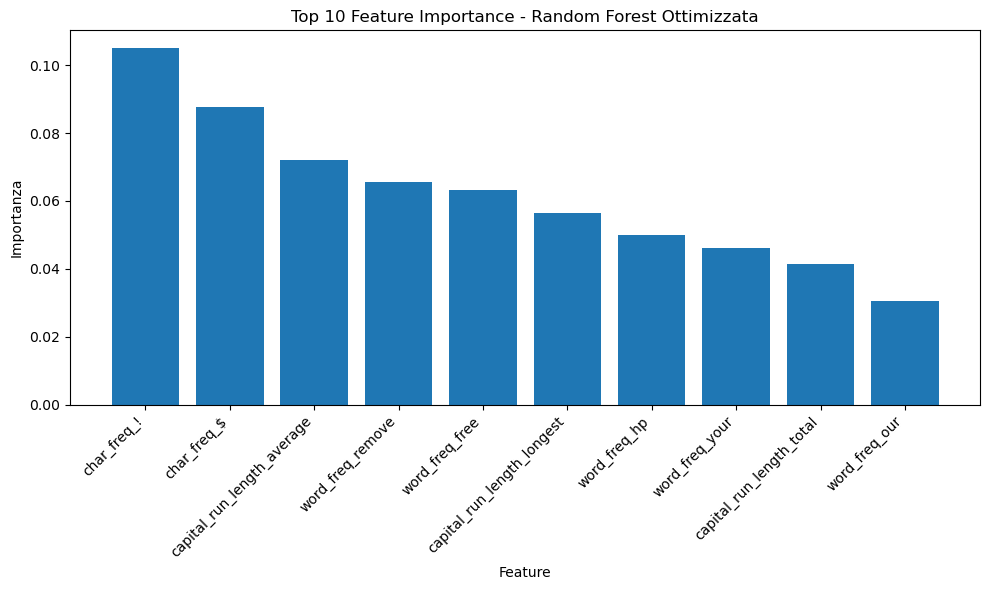

In [40]:
importances_rf = best_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
features_rf = X_train.columns

plt.figure(figsize=(10, 6))
plt.bar(range(10), importances_rf[indices_rf][:10], align='center')
plt.xticks(range(10), [features_rf[i] for i in indices_rf[:10]], rotation=45, ha='right')
plt.title("Top 10 Feature Importance - Random Forest Ottimizzata")
plt.xlabel("Feature")
plt.ylabel("Importanza")
plt.tight_layout()
plt.show()


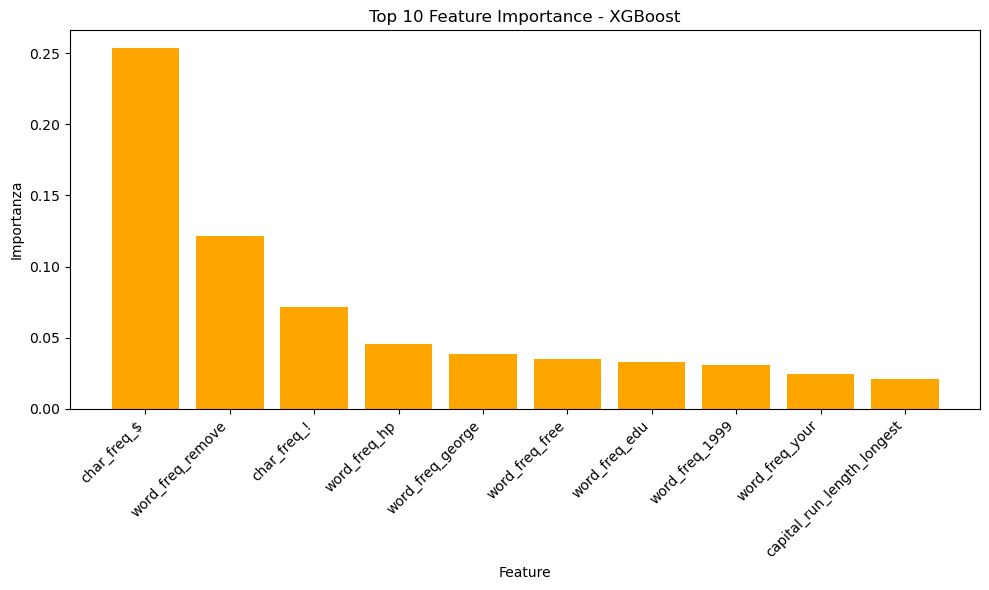

In [41]:
importances_xgb = grid_search_xgb.best_estimator_.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]
features_xgb = X_train_xgb.columns

plt.figure(figsize=(10, 6))
plt.bar(range(10), importances_xgb[indices_xgb][:10], align='center', color='orange')
plt.xticks(range(10), [features_xgb[i] for i in indices_xgb[:10]], rotation=45, ha='right')
plt.title("Top 10 Feature Importance - XGBoost")
plt.xlabel("Feature")
plt.ylabel("Importanza")
plt.tight_layout()
plt.show()


Dal punto di vista interpretativo, l’analisi delle feature più rilevanti ha fornito ulteriori spunti.
Per la Random Forest, le feature più importanti includono:

`char_freq_!`, `char_freq_$`, `capital_run_length_average`, `word_freq_remove`, `word_freq_free`
→ queste rappresentano la frequenza di caratteri o parole spesso associate a email di tipo spam.

Il modello XGBoost, pur avendo una struttura diversa, ha confermato l’importanza di alcune stesse variabili:

`char_freq_$`, `word_freq_remove`, `char_freq_!`, `word_freq_hp`, `word_freq_free`, `word_freq_edu`
→ confermando che simboli come $, ! e parole come "remove", "free", "edu" sono forti indicatori di spam.

In conclusione, tutti i modelli hanno mostrato buone prestazioni, ma la Random Forest si è distinta come la scelta più affidabile e performante, sia per la qualità delle metriche ottenute che per la stabilità sui dati di test.
Il modello è riuscito a generalizzare bene, e risulta quindi adatto all’applicazione nel contesto della classificazione automatica di email spam.

In [43]:
results = pd.DataFrame({
    "Modello": [
        "Logistic Regression",
        "Random Forest base",
        "Random Forest Ottimizzata",
        "XGBoost base",
        "XGBoost Ottimizzato"
    ],
    "Accuracy": [0.93, 0.95, 0.95, 0.93, 0.95],
    "Precision": [0.93, 0.95, 0.95, 0.93, 0.95],
    "Recall": [0.93, 0.95, 0.95, 0.93, 0.95],
    "F1-score": [0.93, 0.95, 0.95, 0.93, 0.95],
    "AUC": [0.985, 0.990, 0.990, 0.980, 0.984]
})

results.style.format({
    "Accuracy": "{:.2f}",
    "Precision": "{:.2f}",
    "Recall": "{:.2f}",
    "F1-score": "{:.2f}",
    "AUC": "{:.3f}"
})


,Modello,Accuracy,Precision,Recall,F1-score,AUC
0,Logistic Regression,0.93,0.93,0.93,0.93,0.985
1,Random Forest base,0.95,0.95,0.95,0.95,0.990
2,Random Forest Ottimizzata,0.95,0.95,0.95,0.95,0.990
3,XGBoost base,0.93,0.93,0.93,0.93,0.980
4,XGBoost Ottimizzato,0.95,0.95,0.95,0.95,0.984
